In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv("titanic_dataset.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

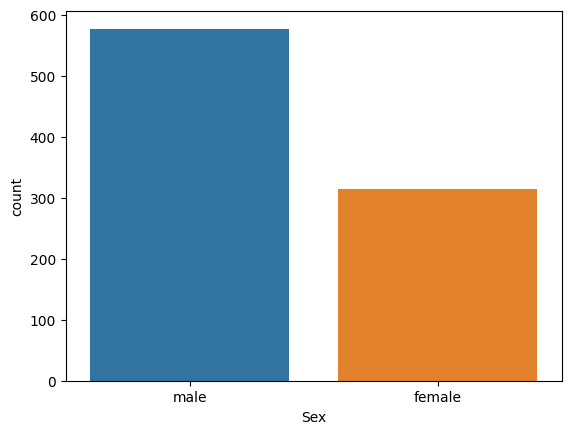

In [8]:
sns.countplot(x = "Sex", data = train)

## Checking the missing data

In [49]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
##the above isnull() method is not very good for checking null values
# becoz it does not give us full info(since most rows are skipped)
# to get a better visualization of missing values use heatmap

<Axes: >

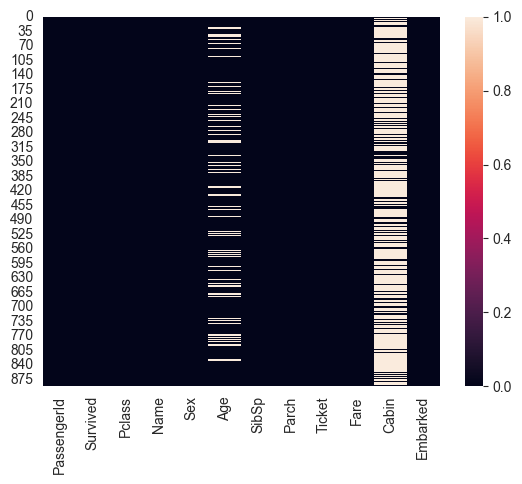

In [51]:
sns.heatmap(train.isnull())

<Axes: xlabel='Survived', ylabel='count'>

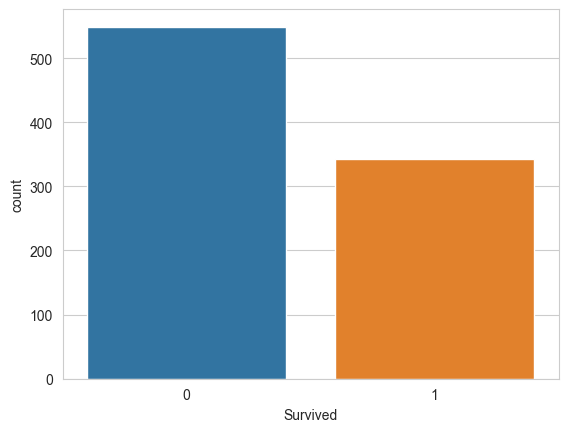

In [52]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = train)

<Axes: xlabel='Survived', ylabel='count'>

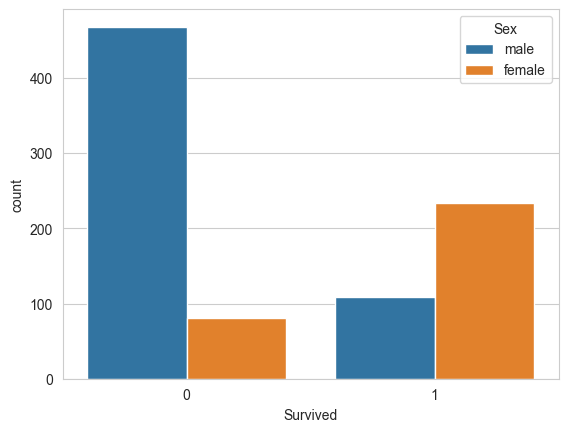

In [53]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = train, hue = "Sex")

<Axes: xlabel='Survived', ylabel='count'>

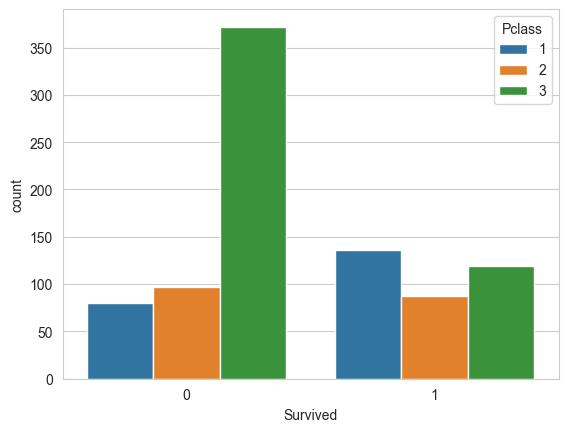

In [54]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = train, hue = "Pclass")

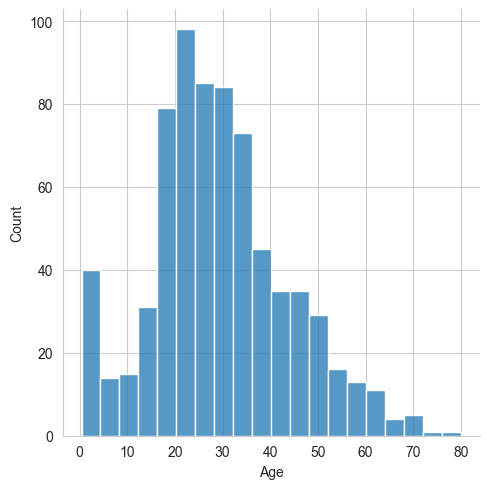

In [55]:
sns.displot(train['Age'].dropna())

<Axes: xlabel='Pclass', ylabel='Age'>

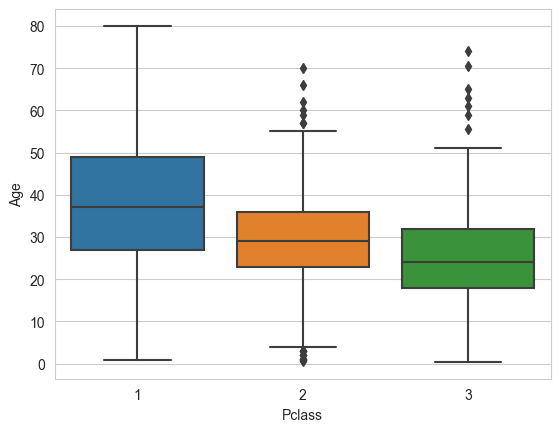

In [56]:
sns.boxplot(x = "Pclass", y = "Age", data = train)

In [57]:
def impute_age(col:list):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [58]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age,axis = 1)#axis 1 refers to apply to each row

<Axes: >

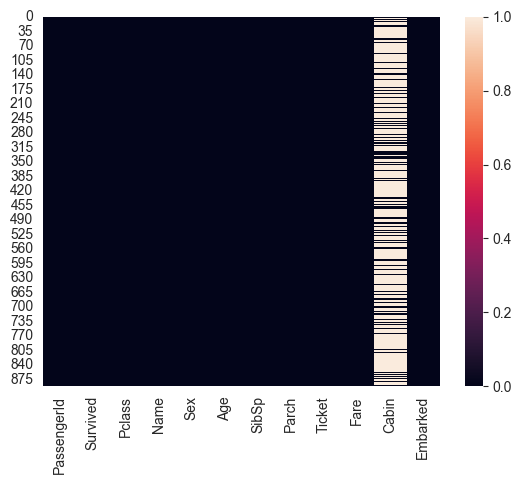

In [59]:
sns.heatmap(train.isnull())

In [60]:
train.drop("Cabin", axis = 1,inplace = True) #putting inplace = false returns a copy.
# if we use inplace = true then it does the action(action of removing something, here cabin)
# it does the action on original data set

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

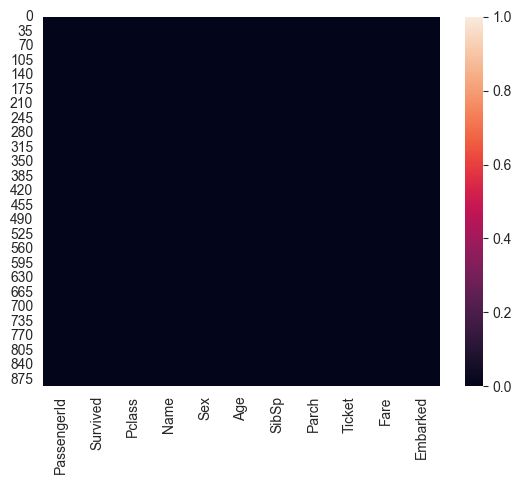

In [62]:
sns.heatmap(train.isnull())

In [63]:
sex = pd.get_dummies(train["Sex"])
embark = pd.get_dummies(train["Embarked"])

In [64]:
train.drop(["Sex","Embarked","Name","Ticket"],axis = 1, inplace = True)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [66]:
train = pd.concat([train, sex, embark],axis = 1)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


# Building a Logistic Regression Model

## Train Test Data Split

In [69]:
train.drop("Survived", axis =1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [70]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(train.drop("Survived",axis = 1),
                                                    train["Survived"],test_size = 0.3,
                                                    random_state = 101)